In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\Ordinary\Desktop\iris.csv')
df .head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.columns=['sepal_len','sepal_wid','petal_len','petal_widt','class']
df.head()

,sepal_len,sepal_wid,petal_len,petal_widt,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
X=df.ix[:,0:4].values
y=df.ix[:,4].values

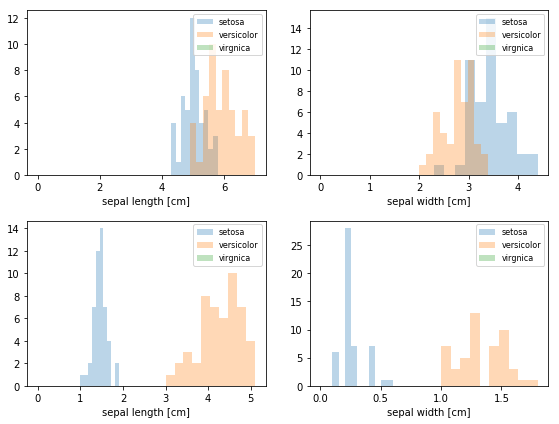

In [21]:
from matplotlib import pyplot as plt
import math

label_dict={1:'setosa',
           2:'versicolor',
           3:'virginica'}
feature_dict={0:'sepal length [cm]',
             1:'sepal width [cm]',
             2:'sepal length [cm]',
             3:'sepal width [cm]'}

plt.figure(figsize=(8,6))
for cnt in range(4):
    plt.subplot(2,2,cnt+1)
    for lab in ('setosa','versicolor','virgnica'):
        plt.hist(X[y==lab,cnt],
                label=lab,
                bins=10,
                alpha=0.3)
        plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right',fancybox=True,fontsize=8)
plt.tight_layout()
plt.show()
    

In [23]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)
print(X_std)

[[ -9.00681170e-01   1.03205722e+00  -1.34127240e+00  -1.31297673e+00]
 [ -1.14301691e+00  -1.24957601e-01  -1.34127240e+00  -1.31297673e+00]
 [ -1.38535265e+00   3.37848329e-01  -1.39813811e+00  -1.31297673e+00]
 [ -1.50652052e+00   1.06445364e-01  -1.28440670e+00  -1.31297673e+00]
 [ -1.02184904e+00   1.26346019e+00  -1.34127240e+00  -1.31297673e+00]
 [ -5.37177559e-01   1.95766909e+00  -1.17067529e+00  -1.05003079e+00]
 [ -1.50652052e+00   8.00654259e-01  -1.34127240e+00  -1.18150376e+00]
 [ -1.02184904e+00   8.00654259e-01  -1.28440670e+00  -1.31297673e+00]
 [ -1.74885626e+00  -3.56360566e-01  -1.34127240e+00  -1.31297673e+00]
 [ -1.14301691e+00   1.06445364e-01  -1.28440670e+00  -1.44444970e+00]
 [ -5.37177559e-01   1.49486315e+00  -1.28440670e+00  -1.31297673e+00]
 [ -1.26418478e+00   8.00654259e-01  -1.22754100e+00  -1.31297673e+00]
 [ -1.26418478e+00  -1.24957601e-01  -1.34127240e+00  -1.44444970e+00]
 [ -1.87002413e+00  -1.24957601e-01  -1.51186952e+00  -1.44444970e+00]
 [ -5.

In [24]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std - mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print('Covariance matrix \n%s'%cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [25]:
print('Numpy covariance matirx: \n%s' %np.cov(X_std.T))

Numpy covariance matirx: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [29]:
cov_mat=np.cov(X_std.T)

eig_vals,eig_vecs=np.linalg.eig(cov_mat)

print('Eigenvectors \n%s'%eig_vecs)
print('Eigenvalues \n%s'%eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [33]:
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)
print('-------------------')
eig_pairs.sort(key=lambda x: x[0],reverse=True)

print('Rigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

[(2.9303537755893174, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.92740362151734212, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163944, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.020746013995595943, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]
-------------------
Rigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


In [40]:
tot = sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print(var_exp)
cum_var_exp=np.cumsum(var_exp)
cum_var_exp

[72.770452093801339, 23.03052326768065, 3.6838319576273775, 0.5151926808906323]


array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

In [41]:
a=np.array([1,2,3,4])
print(a)
print('-----------------')
print(np.cumsum(a))

[1 2 3 4]
-----------------
[ 1  3  6 10]


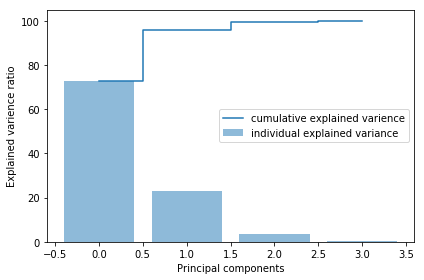

In [42]:
plt.figure (figsize=(6,4))
plt.bar(range(4),var_exp,alpha=0.5,align='center',
       label='individual explained variance')
plt.step(range(4),cum_var_exp,where='mid',
        label='cumulative explained varience')
plt.ylabel('Explained varience ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [43]:
matrix_w=np.hstack((eig_pairs[0][1].reshape(4,1),
                  eig_pairs[1][1].reshape(4,1)))
print('Matric W:\n',matrix_w)

Matric W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [50]:
Y=X_std.dot(matrix_w)
Y

[[ -2.26454173e+00  -5.05703903e-01]
 [ -2.08642550e+00   6.55404729e-01]
 [ -2.36795045e+00   3.18477311e-01]
 [ -2.30419716e+00   5.75367713e-01]
 [ -2.38877749e+00  -6.74767397e-01]
 [ -2.07053681e+00  -1.51854856e+00]
 [ -2.44571134e+00  -7.45626750e-02]
 [ -2.23384186e+00  -2.47613932e-01]
 [ -2.34195768e+00   1.09514636e+00]
 [ -2.18867576e+00   4.48629048e-01]
 [ -2.16348656e+00  -1.07059558e+00]
 [ -2.32737775e+00  -1.58587455e-01]
 [ -2.22408272e+00   7.09118158e-01]
 [ -2.63971626e+00   9.38281982e-01]
 [ -2.19229151e+00  -1.88997851e+00]
 [ -2.25146521e+00  -2.72237108e+00]
 [ -2.20275048e+00  -1.51375028e+00]
 [ -2.19017916e+00  -5.14304308e-01]
 [ -1.89407429e+00  -1.43111071e+00]
 [ -2.33994907e+00  -1.15803343e+00]
 [ -1.91455639e+00  -4.30465163e-01]
 [ -2.20464540e+00  -9.52457317e-01]
 [ -2.77416979e+00  -4.89517027e-01]
 [ -1.82041156e+00  -1.06750793e-01]
 [ -2.22821750e+00  -1.62186163e-01]
 [ -1.95702401e+00   6.07892567e-01]
 [ -2.05206331e+00  -2.66014312e-01]
 

array([[ -2.26454173e+00,  -5.05703903e-01],
       [ -2.08642550e+00,   6.55404729e-01],
       [ -2.36795045e+00,   3.18477311e-01],
       [ -2.30419716e+00,   5.75367713e-01],
       [ -2.38877749e+00,  -6.74767397e-01],
       [ -2.07053681e+00,  -1.51854856e+00],
       [ -2.44571134e+00,  -7.45626750e-02],
       [ -2.23384186e+00,  -2.47613932e-01],
       [ -2.34195768e+00,   1.09514636e+00],
       [ -2.18867576e+00,   4.48629048e-01],
       [ -2.16348656e+00,  -1.07059558e+00],
       [ -2.32737775e+00,  -1.58587455e-01],
       [ -2.22408272e+00,   7.09118158e-01],
       [ -2.63971626e+00,   9.38281982e-01],
       [ -2.19229151e+00,  -1.88997851e+00],
       [ -2.25146521e+00,  -2.72237108e+00],
       [ -2.20275048e+00,  -1.51375028e+00],
       [ -2.19017916e+00,  -5.14304308e-01],
       [ -1.89407429e+00,  -1.43111071e+00],
       [ -2.33994907e+00,  -1.15803343e+00],
       [ -1.91455639e+00,  -4.30465163e-01],
       [ -2.20464540e+00,  -9.52457317e-01],
       [ -

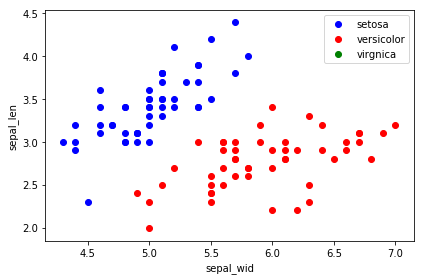

In [46]:
plt.figure (figsize=(6,4))
for lab,col in zip (('setosa','versicolor','virgnica'),
                   ('blue','red','green')):
    plt.scatter(X[y==lab,0],
               X[y==lab,1],
               label=lab,
               c=col)
plt.ylabel('sepal_len')
plt.xlabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

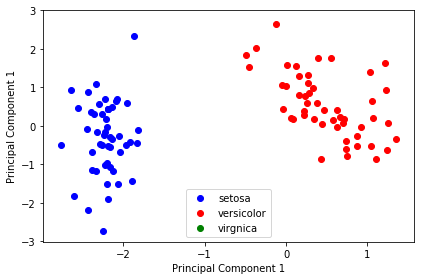

In [51]:
plt.figure (figsize=(6,4))
for lab,col in zip (('setosa','versicolor','virgnica'),
                   ('blue','red','green')):
    plt.scatter(Y[y==lab,0],
               Y[y==lab,1],
               label=lab,
               c=col)
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 1')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()